In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ATTACK_TARGET = "01"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [3]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [4]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir("../data")

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"../data/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,M,18,5,17,1,0,4,2,0,4,5,2,5,0,5,2,5
1,M,18,16,672,0,4,0,0,0,0,4,0,5,0,0,0,2
2,F,1,0,629,4,1,2,1,2,5,0,4,0,0,4,1,3
3,F,25,2,104,2,0,3,4,2,5,0,4,0,0,0,5,3
4,F,25,15,894,5,5,0,2,0,5,5,2,3,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,18,0,681,4,3,4,0,3,4,2,5,1,1,0,0,3
9996,F,35,11,921,2,1,3,1,0,3,0,0,5,0,1,0,1
9997,F,56,16,891,2,2,0,5,5,3,4,1,4,0,3,1,0
9998,F,50,4,273,1,4,4,5,0,1,4,3,4,5,1,2,4


### Ba, Bbの読み込み

In [5]:
Ba = pd.read_csv(f"../data/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Jocelin Coumbe,F,18,1,193
1,Reider Torrans,M,35,20,281
2,Guthrie Scroyton,M,18,0,18
3,Daffie Morrel,F,45,6,396
4,Etheline MacGlory,F,50,19,863


In [6]:
Bb = pd.read_csv(f"../data/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,1,0,0,3,1,4,2,0,4,*,...,3,3,4,3,0,5,0,5,0,1
1,2,3,0,5,4,0,3,0,0,0,...,2,2,4,0,0,2,3,1,2,3
2,0,0,2,2,1,2,0,0,3,5,...,4,0,1,0,0,0,3,5,4,0
3,4,2,2,4,0,5,1,5,*,1,...,4,1,5,0,1,4,0,2,1,5
4,0,0,4,5,4,4,0,2,3,5,...,1,3,2,3,1,0,0,5,2,4


### 攻撃に利用するGAOZと映画のIDの全ペア

In [7]:
cross_tab_pairs = []

for gaoz_header in B_USER_ATTRIBUTE_HEADERS:
    for movie_id in MOVIE_IDS:
        cross_tab_pairs.append((gaoz_header, movie_id))

cross_tab_pairs[:4]

[('Gender', '2'), ('Gender', '56'), ('Gender', '247'), ('Gender', '260')]

### C0~C9の各cross集計の平均をとる

In [30]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for gaoz_header, movie_id in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[gaoz_header], combined_data[movie_id], normalize='all')
    cross_tabs[(gaoz_header, movie_id)] = cross_tab

cross_tabs[cross_tab_pairs[0]]

2,0,1,2,3,4,5
Gender,,,,,,
F,0.1616,0.0653,0.06905,0.0777,0.0595,0.0537
M,0.1679,0.0684,0.07135,0.0849,0.0655,0.0551


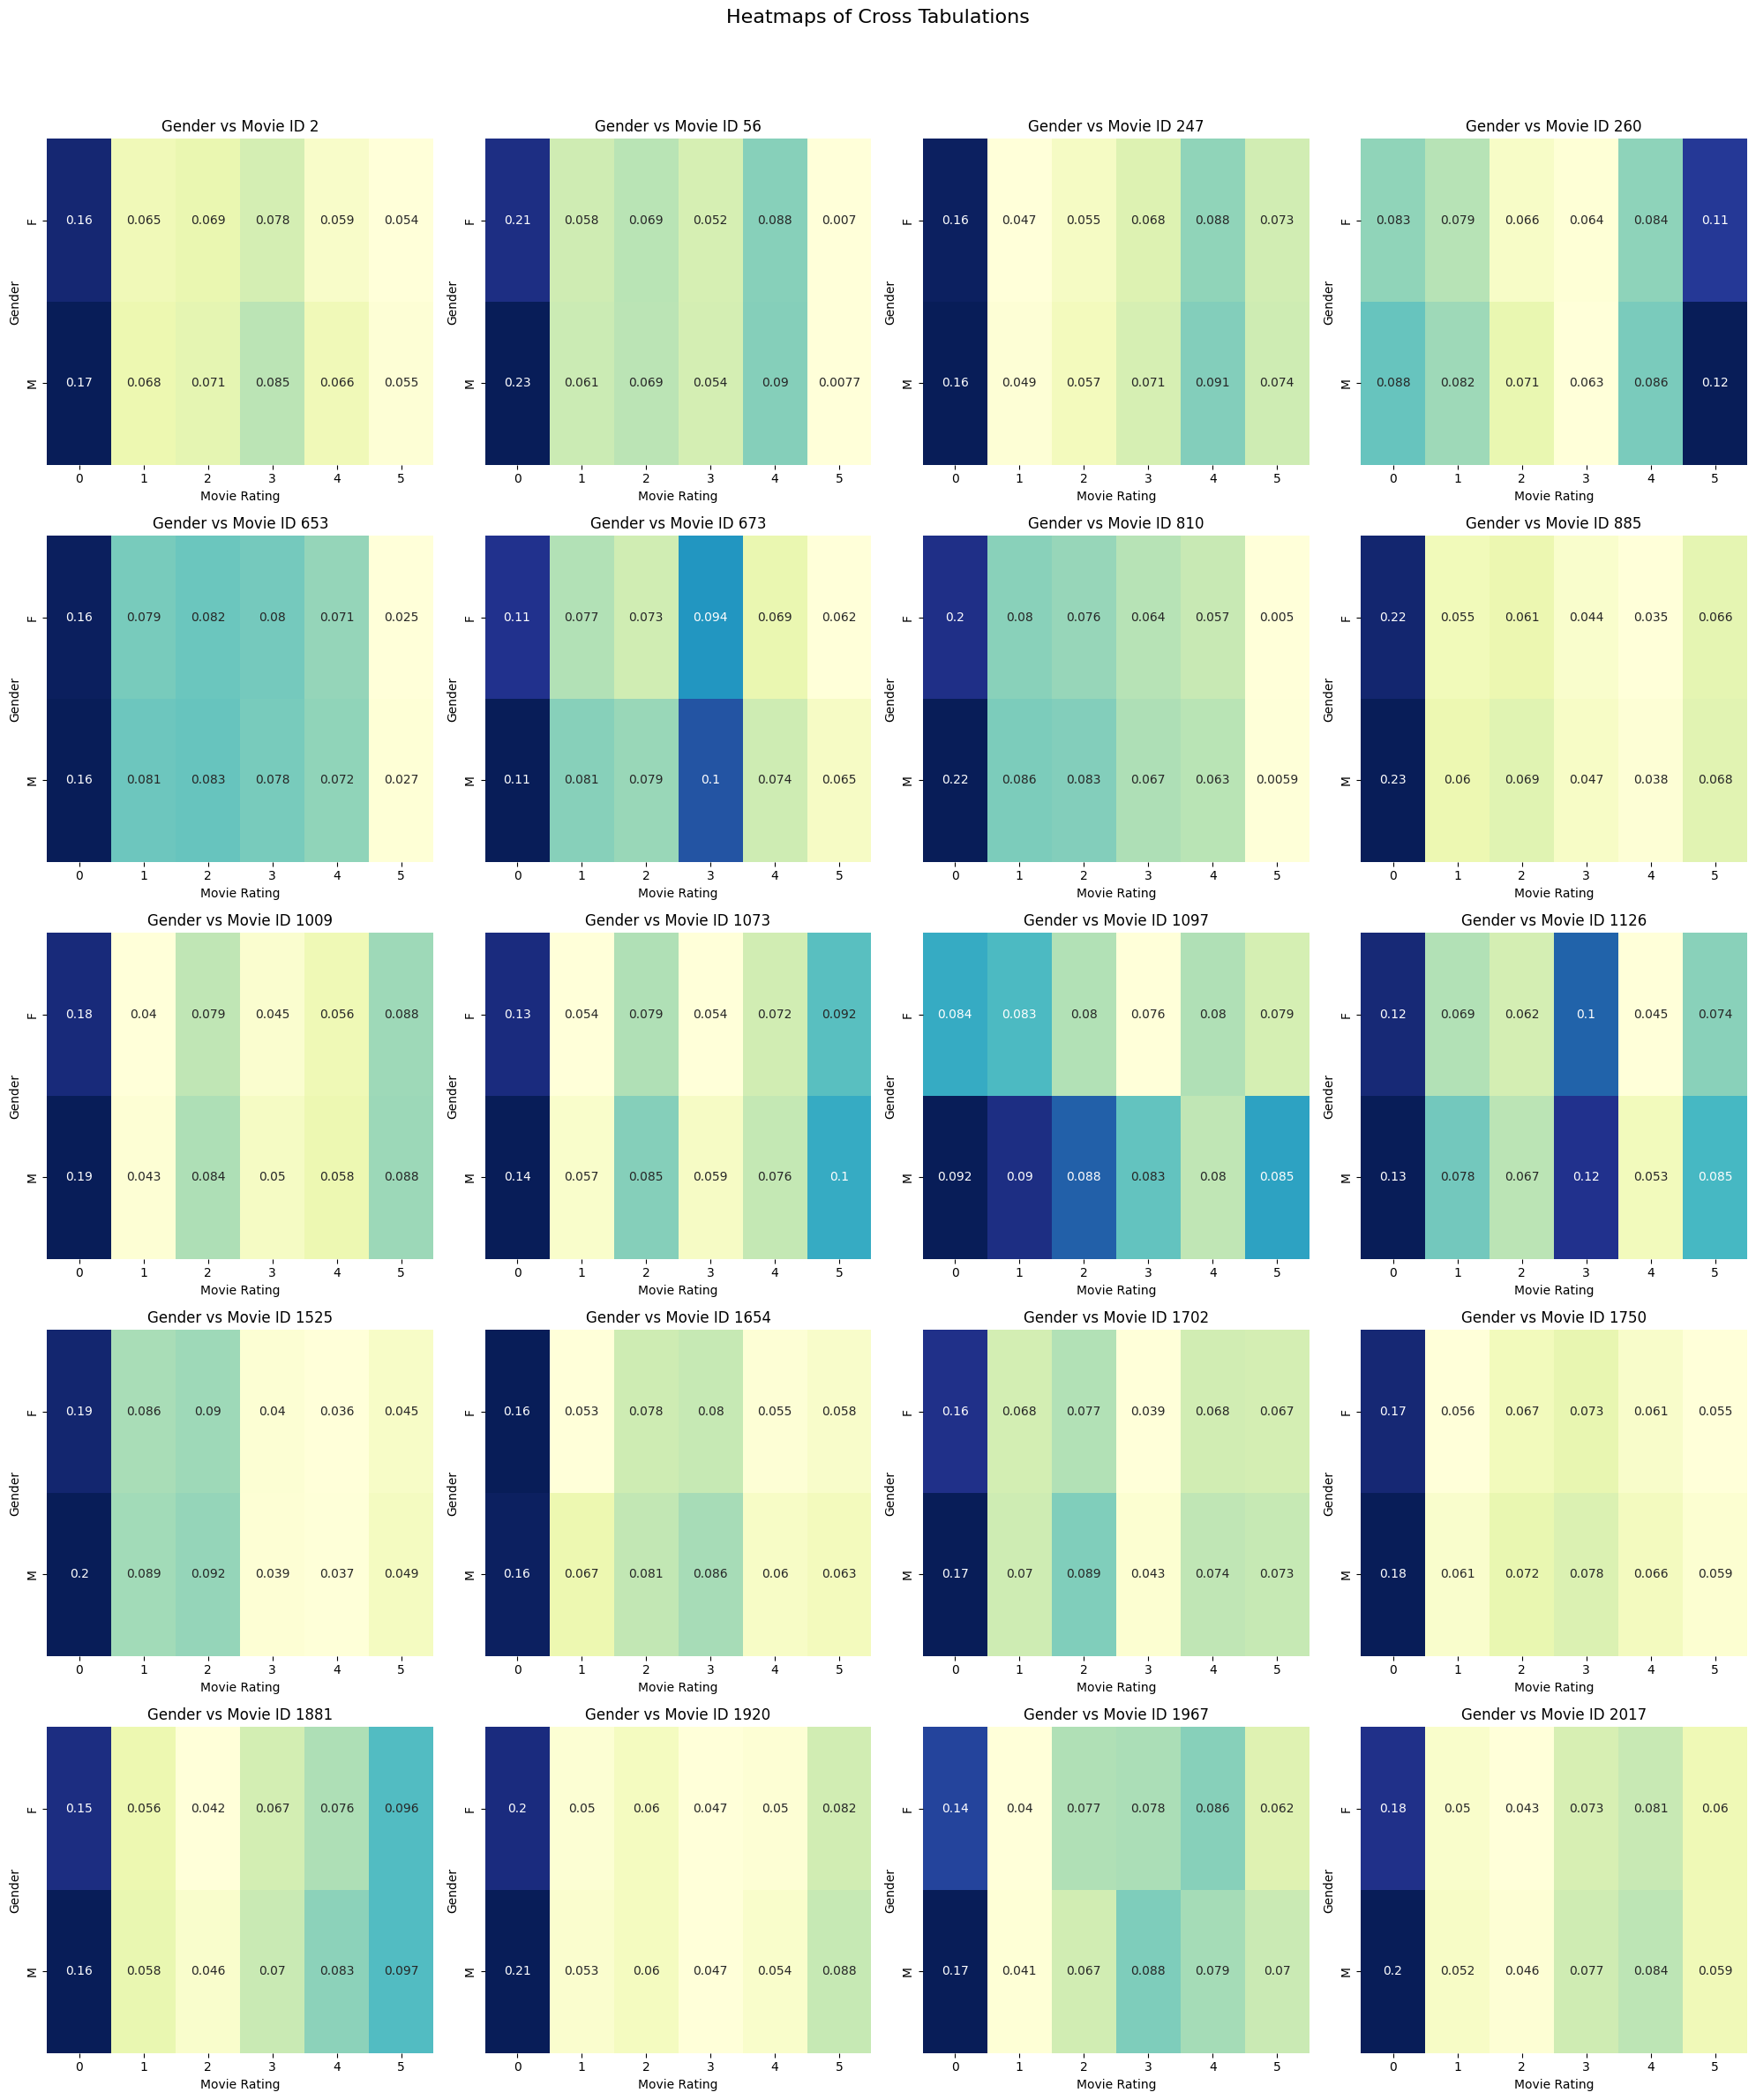

Total number of cross tabulations: 184


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12):
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)

    for i, ((gaoz_header, movie_id), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{gaoz_header} vs Movie ID {movie_id}")
        ax.set_ylabel(gaoz_header)
        ax.set_xlabel("Movie Rating")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=20)

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Bbの特定の行の各映画のReviewごとのGAOZの確率の試算

In [140]:
target_Bb_row_index = 8
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:5]

2      2
56     4
247    0
260    1
653    0
Name: 8, dtype: object

In [141]:
target_gaoz = "ZIP-code" # "Age" | "Occupation" | "ZIP-code"

# 各映画IDに対する target_cross を格納するリスト
target_BB_row_cross_tabs = []

for movie_id in MOVIE_IDS:
    cross_tab = cross_tabs[(target_gaoz, movie_id)]
    # Bbの対象行の映画の評価値を取得
    bb_review_value_for_selected_movie = target_Bb_row[movie_id]
    if bb_review_value_for_selected_movie == "*":
        continue
    target_cross_tab = cross_tab[int(bb_review_value_for_selected_movie)]
    target_BB_row_cross_tabs.append(target_cross_tab)

target_BB_row_cross_tabs = pd.concat(target_BB_row_cross_tabs, axis=1)
target_BB_row_cross_tabs

,2,4,0,1,0,5,4,2,3,5,...,5,0,1,2,1,1,3,0,2,0
ZIP-code,,,,,,,,,,,,,,,,,,,,,
6,0.00040,0.00030,0.000867,0.000300,0.00100,0.000125,0.00040,0.00035,0.00015,0.000425,...,0.000533,0.0015,0.00030,0.00035,0.00035,0.0002,0.00065,0.0005,0.00040,0.00120
10,0.00010,0.00050,0.000733,0.000275,0.00065,0.000375,0.00010,0.00020,0.00010,0.000225,...,0.000133,0.0007,0.00005,0.00025,0.00020,0.0001,0.00035,0.0006,0.00010,0.00095
12,0.00010,0.00015,0.000333,0.000250,0.00050,0.000025,0.00030,0.00030,0.00015,0.000150,...,0.000400,0.0007,0.00035,0.00010,0.00020,0.0001,0.00025,0.0003,0.00015,0.00040
13,0.00060,0.00055,0.000767,0.000275,0.00090,0.000225,0.00040,0.00010,0.00035,0.000625,...,0.000333,0.0012,0.00035,0.00080,0.00030,0.0002,0.00020,0.0009,0.00020,0.00125
15,0.00000,0.00020,0.000233,0.000275,0.00025,0.000200,0.00010,0.00010,0.00000,0.000325,...,0.000200,0.0003,0.00050,0.00020,0.00005,0.0000,0.00030,0.0004,0.00015,0.00045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.00025,0.00015,0.000633,0.000250,0.00035,0.000175,0.00035,0.00030,0.00035,0.000250,...,0.000400,0.0004,0.00055,0.00035,0.00030,0.0000,0.00040,0.0007,0.00005,0.00055
991,0.00030,0.00005,0.000733,0.000350,0.00085,0.000000,0.00015,0.00010,0.00015,0.000350,...,0.000200,0.0013,0.00005,0.00025,0.00025,0.0001,0.00010,0.0008,0.00025,0.00100
992,0.00005,0.00025,0.000767,0.000225,0.00105,0.000300,0.00030,0.00020,0.00005,0.000725,...,0.000433,0.0011,0.00025,0.00045,0.00050,0.0001,0.00035,0.0006,0.00035,0.00120


In [142]:
# TODO: ここがSUMでいいのかは要検討
target_BB_row_probabilities = target_BB_row_cross_tabs.sum(axis=1)
target_BB_row_probabilities

ZIP-code
6      0.024117
10     0.018842
12     0.012942
13     0.021825
15     0.009333
         ...   
990    0.014150
991    0.015408
992    0.021875
993    0.021650
997    0.024008
Length: 495, dtype: float64

In [143]:
# 確立が合計で1になるように正規化
total_prob = target_BB_row_probabilities.sum()
normalized_target_BB_row_probabilities = target_BB_row_probabilities / total_prob
normalized_target_BB_row_probabilities.sort_values(ascending=False)

ZIP-code
559    0.003959
321    0.003796
554    0.003704
166    0.003654
944    0.003608
         ...   
15     0.001030
41     0.001013
917    0.000954
53     0.000937
22     0.000881
Length: 495, dtype: float64

### 上はGAOZのうちの一つであったが、GAOZそれぞれの確率を取れるようにする

In [144]:
gaoz_probabilities = {}

for target_gaoz in B_USER_ATTRIBUTE_HEADERS:
    # 各映画IDに対する target_cross を格納するリスト
    target_BB_row_cross_tabs = []

    for movie_id in MOVIE_IDS:
        cross_tab = cross_tabs[(target_gaoz, movie_id)]
        # Bbの対象行の映画の評価値を取得
        bb_review_value_for_selected_movie = target_Bb_row[movie_id]
        if bb_review_value_for_selected_movie == "*":
            continue
        target_cross_tab = cross_tab[int(bb_review_value_for_selected_movie)]
        target_BB_row_cross_tabs.append(target_cross_tab)

    target_BB_row_cross_tabs = pd.concat(target_BB_row_cross_tabs, axis=1)
    target_BB_row_probabilities = target_BB_row_cross_tabs.sum(axis=1)
    total_prob = target_BB_row_probabilities.sum()
    normalized_target_BB_row_probabilities = target_BB_row_probabilities / total_prob

    gaoz_probabilities[target_gaoz] = normalized_target_BB_row_probabilities

gaoz_probabilities

{'Gender': Gender
 F    0.486127
 M    0.513873
 dtype: float64,
 'Age': Age
 1     0.089100
 18    0.158812
 25    0.177559
 35    0.185624
 45    0.132816
 50    0.153717
 56    0.102372
 dtype: float64,
 'Occupation': Occupation
 0     0.088381
 1     0.051112
 2     0.046456
 3     0.058350
 4     0.044725
 5     0.036225
 6     0.034918
 7     0.047607
 8     0.038107
 9     0.044625
 10    0.046439
 11    0.045243
 12    0.050455
 13    0.037975
 14    0.047214
 15    0.035404
 16    0.057248
 17    0.051445
 18    0.048462
 19    0.039737
 20    0.049871
 dtype: float64,
 'ZIP-code': ZIP-code
 6      0.002662
 10     0.002080
 12     0.001429
 13     0.002409
 15     0.001030
          ...   
 990    0.001562
 991    0.001701
 992    0.002415
 993    0.002390
 997    0.002650
 Length: 495, dtype: float64}

### 上のGAOZごとの確率を参考にしながら、Baのどれなら一番確率が高くなるかを求める

In [145]:
Ba_with_gaoz_prob = Ba[B_USER_ATTRIBUTE_HEADERS].copy()
Ba_with_gaoz_prob["Probability"] = 0.0
Ba_with_gaoz_prob.head()

,Gender,Age,Occupation,ZIP-code,Probability
0,F,18,1,193,0.0
1,M,35,20,281,0.0
2,M,18,0,18,0.0
3,F,45,6,396,0.0
4,F,50,19,863,0.0


In [146]:
def calculate_probability(row):
    prob = 1.0
    for attr in B_USER_ATTRIBUTE_HEADERS:
        attr_value = row[attr]
        prob *= gaoz_probabilities[attr][attr_value]
    return prob

# Ba の各行に対して確率を計算
Ba_with_gaoz_prob['Probability'] = Ba_with_gaoz_prob.apply(calculate_probability, axis=1)
Ba_with_gaoz_prob.sort_values('Probability', ascending=False).head()


,Gender,Age,Occupation,ZIP-code,Probability
41,M,25,0,280,0.000021
13,M,45,0,480,0.000019
10,M,18,0,468,0.000019
2,M,18,0,18,0.000018
49,M,50,0,323,0.000013


In [147]:
# Ba_with_gaoz_prob.sort_values('Probability', ascending=False).head().iloc[0]